# Assignment 2

**Your student ID, name and course level:**

- uID: u7741198
- Name: Jessica Lai
- Course level: COMP8880

**Link for Colab:**

- Link: https://drive.google.com/drive/folders/1kGnaIe-vjzF_ytkUM0p-pQG2o9xynD_7?usp=share_link

The file mounting system in Colab is different from running code locally. When running in Colab, please run the following code first.
If you have placed the assignment folder in the default "Colab Notebooks" folder on your Google Drive, use the provided path `Colab Notebooks/A2`. Otherwise, please modify the path to match your own.

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/Colab Notebooks/Assignment 2')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Imports
import random
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from collections import deque #note that this will be use for Problem 2.2 Task 2
from scipy import stats, optimize, interpolate
from Utils import plot_eigs, empirical_CCDF #Function from Utils.py

---

# Problem 1: Heavy-tails and Light-tails

## Problem 1.1: Heavy-tail vs light-tail (1.0 points)
Consider Weibull distributions with parameters $(\alpha, \beta)$, whose probability density function $f(x)=\alpha\beta(\beta x)^{\alpha -1} e^{-(\beta x)^\alpha}$, and complimentary cumulative density function (CCDF) $\bar F(x)= e^{-(\beta x)^\alpha}$. Consider the following three distributions with given values of $(\alpha, \beta)$, which one(s) are heavy-tailed, and which one(s) are light-tailed? Provide proofs for your claims.   
(A) $\alpha=0.5$, $\beta=2.0$  
(B) $\alpha=1.0$, $\beta=2.0$  
(C) $\alpha=2.0$, $\beta=2.0$  


TODO:

In problem1.1, I decide to use tail decay to distinguish heavy-tailed or light-tailed!
1. A distribution is heavy-tailed:\
  The distribution's tail decays slower than exponential!
  $  \forall  \lambda >0  \quad \lim_{x \to \infty} e^{\lambda x} \, \overline{F}(x) = \infty  $

2. A distribution is light-tailed:\
  The distribution's tail decays exponentially or faster!
   $
   \exists \lambda>0 \text{ such that} \lim_{x \to \infty} e^{\lambda x}\, \overline{F}(x)=0
   $



So, use above way to distinguish heavy-tailed or light-tailed!

<br>

(A) $ 𝛼=0.5 ,  𝛽=2.0: Heavy-tailed$\
<span><strong>Step 1: Calculate Tail</strong></span>
\
$ \overline{F}(x) = e^{-(2x)^{0.5}} = e^{-\sqrt{2x}}$\
<span><strong>Step2: Check tail decay</strong></span>
\
 As $x \to \infty$, the term $\lambda x$ grows much faster than $\sqrt{2x}$.\
Therefore, $ \forall  \lambda >0  \quad \lim_{x \to \infty} e^{\lambda x} \, e^{-\sqrt{2x}} = \infty.  $\
This distribution is Heavy-tailed!

<br>

(B) $ 𝛼=1.0 ,  𝛽=2.0: Light-tailed$

<span><strong>Step 1: Calculate Tail</strong></span>
\
$ \overline{F}(x) = e^{-(2x)^{1}} = e^{-2x}$\
<span><strong>Step2: Check tail decay</strong></span>
\
 As $x \to \infty$, the term $\lambda x$ grows  same as $2x$.\
Therefore, $  \exists \lambda>0 \text{ such that} \lim_{x \to \infty} e^{\lambda x}\,  e^{-2x}=0$\
This distribution is Light-tailed!

<br>

(C) $ 𝛼=2.0 ,  𝛽=2.0: Light-tailed$

<span><strong>Step 1: Calculate Tail</strong></span>
\
$ \overline{F}(x) = e^{-(2x)^{2}} = e^{-4 {x^{2}}}$\
<span><strong>Step2: Check tail decay</strong></span>
\
 As $x \to \infty$, the term $\lambda x$ grows much slower than $4 {x^{2}}$.\
Therefore, $   \exists \lambda>0 \text{ such that} \lim_{x \to \infty} e^{\lambda x}\, e^{-4 {x^{2}}}=0 $\
This distribution is Light-tailed!

---

## Problem 1.2: Conspiracy vs catastrophe (2.0 points)

What is the likely value of a random variable when the sum (or averages) of several i.i.d. draws are known?  $X_1$ and $X_2$ follow i.i.d. Weibull distribution with parameters set (A)(B)(C) specified in question 1.1 above.

- *(optional but recommended)* Derive the probability distribution of $X_1 + X_2$.
- *(required)* Derive the conditional density function $p(x_1 | x_1 + x_2 = 5)$
- *(required)* Plot the resulting three distributions in the same x-y plot, with the x-axis being $x_1 \in (0, 5)$, and the y-axis being the conditional density function.

**Note:** In this question, you are not required to evaluate the integrals (i.e. you can leave the integrals as-is). To evaluate the integrals numerically, you can use `scipy.integrate.quad`.

TODO:

1. Derive the probability distribution of $𝑋1+𝑋2 $.

 <span><strong>Step1:</span></strong> Recording that the probability density function of Weibull distribution is : $f(x)=\alpha\beta(\beta x)^{\alpha -1} e^{-(\beta x)^\alpha}$

 <br>

 <span><strong>Step2</span></strong>: Given that $ X_1, X_2 \sim \text{Weibull}(\alpha, \beta), \quad X_1, X_2 \text{ are iid(independent and identically distributed)}.$

 <br>

 <span><strong>Step3:</span></strong> Since $X_1$ and $X_2$ are iid, the sum $Z= X_1 + X_2$ has a pdf given by the convolution of their individual probability density functions:

 $ f_Z(z) = \int_0^z f_{X_1}(x) f_{X_2}(z-x) \, dx$

 Using the Weibull PDF:

 $ f_Z(z) = \int_0^z \left[\alpha \beta \left (\beta x \right)^{\alpha -1} e^{-(\beta x)^\alpha}\right] \left[\alpha \beta \left( \beta (z-x) \right)^{\alpha -1} e^{-(\beta (z-x)^\alpha)} \right] dx $

 Then:
 $f_Z(z) = \alpha^2 \beta^2 \int_0^z \left( \beta x \right)^{\alpha - 1} \left( \beta (z-x) \right)^{\alpha - 1} e^{-(\beta x)^\alpha -(\beta (z-x))^\alpha} \, dx$



2. Derive the conditional density function  $𝑝(𝑥1|𝑥1+𝑥2=5) $

 $𝑝(𝑥1|𝑥1+𝑥2=5) = 𝑝(𝑥1|Z=5) = \frac{f_{X_1}(X_1) f_{X_2}(5 - x_1)}{f_Z(5)} = \frac{\alpha \beta  (\beta x_1)^{\alpha -1} e^{-(\beta x_1)^\alpha}\cdot \alpha \beta  (\beta (5-x_1))^{\alpha -1} e^{-(\beta (5-x_1))^\alpha}}{\alpha^2 \beta^2 \int_0^5 \left( \beta x \right)^{\alpha - 1} \left( \beta (5-x) \right)^{\alpha - 1} e^{-(\beta x)^\alpha -(\beta (5-x))^\alpha} \quad dx}$

 Then:

 $𝑝(𝑥1|Z=5) = \frac{f_{X_1}(X_1) f_{X_2}(5 - x_1)}{f_Z(5)} =
 \frac{ (\beta x_1)^{\alpha -1} e^{-(\beta x_1)^\alpha} \cdot  (\beta (5-x_1))^{\alpha -1} e^{-(\beta (5-x_1))^\alpha}}{ \int_0^5 \left( \beta x \right)^{\alpha - 1} \left( \beta (5-x) \right)^{\alpha - 1} e^{-(\beta x)^\alpha -(\beta (5-x))^\alpha} \quad dx}$


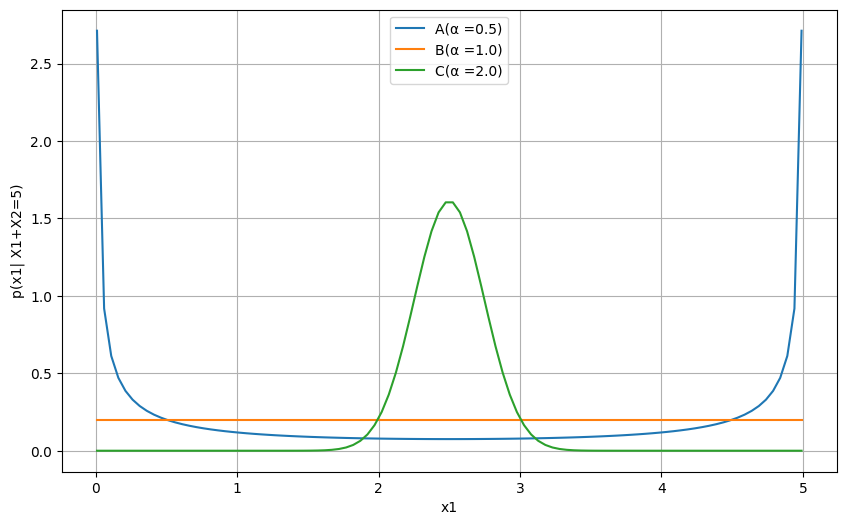

In [ ]:
#TODO
#Plot the resulting three distributions in the same x-y plot, with the x-axis being  𝑥1∈(0,5) , and the y-axis being the conditional density function.
from scipy.integrate import quad

def weibull_pdf(x, alpha, beta):
  return alpha * beta *(beta * x)**(alpha -1)* np.exp(-(beta * x)**alpha)

#Already derive the conditional density function  𝑝(𝑥1|𝑥1+𝑥2=5)
def conditional_density(x1,alpha,beta, Z=5):
   numerator = weibull_pdf(x1, alpha, beta) *weibull_pdf(Z-x1, alpha, beta)
   # To evaluate the integrals numerically, you can use scipy.integrate.quad.
   denominator, _ = quad(lambda x: weibull_pdf(x, alpha, beta)* weibull_pdf(Z-x, alpha, beta),0, Z )
   return numerator / denominator


# PARAMETER SET OF (A)(B)(C)
parameters =[
    {"alpha": 0.5, "beta":2.0, "label": "A(α =0.5)"},#(A)
    {"alpha": 1.0, "beta":2.0, "label": "B(α =1.0)"},#(B)
    {"alpha": 2.0, "beta":2.0, "label": "C(α =2.0)"} #(C)
]

x1 =np.linspace(0.01, 4.99, 100) # with the x-axis being  𝑥1∈(0,5)
plt.figure(figsize=(10,6))
for parameter in parameters:
  y= [conditional_density(x, parameter["alpha"], parameter["beta"]) for x in x1]
  plt.plot(x1, y, label = parameter["label"])

plt.xlabel("x1");plt.ylabel("p(x1| X1+X2=5)"); plt.legend();plt.grid()
plt.show()



---

## Problem 1.3: Hazard rate and distribution (1.0 points)

Consider a random variable $x$ being the ``inter-arrival time'', or time before the next event (e.g. a bus, or a Reddit reply) arrives.  
1. For one given data domain, we know that the hazard rate is power-law with the form $q(t) = \lambda t^{-\gamma}$, where $\lambda$ and $\gamma$ are positive constants. What is the pdf $f(x) $ and CCDF $\bar F(x) $? Show your derivations.

**Hint:** Check the heavy tail distributions we have covered, which distribution has a power-law hazard rate.

TODO:

<span><strong>Step1: Compute the Cumulative Hazard Function</span></strong>

As we know, the cumulate Hazard function is defined as $ H(t) = \int_0^t q(u) \, du = \int_0^t \lambda u^{- \gamma} \, du$

Then,
$
H(t) = \lambda \int_0^t u^{-\gamma} \, du
= \lambda \left[ \frac{u^{1-\gamma}}{1- \gamma} \right]_0^t
= \frac{\lambda}{1 - \gamma} t^{1 - \gamma}.$



Note that this only hold when $ \gamma < 1$.
If $ \gamma \geq 1$, $\int_0^t u^{-\gamma} \, du \to \infty \quad (\text{because it diverges near } u =0).$

<span><strong>Step2: Derive CCDF $\bar F(x)$ </span></strong>

As we know, the relationship between H(t) and $\bar F(x)$:
$\overline{F}(t) = e^{-H(t)} = \exp \left( -\frac{\lambda}{1- \gamma} t^{1- \gamma}\right)$


<span><strong>Step3: Derive PDF $f(x)$ </span></strong>

The Hazard rate is defined as:
$ q(t) = \frac{f(t)}{\overline{F}(t)} \;\; \Rightarrow \;\; f(t) =q(t) \cdot \overline{F}(t) $

Then, substitute $q(t)$ and $\overline{F}(t)$:
$f(t) = \lambda t^{- \gamma} \cdot \exp \left( -\frac{\lambda}{1-\gamma} t^{1 - \gamma}\right)$


<span><strong>Step4: Check the distribution Type </span></strong>

The CCDF of Hazard rate is $\overline{F}(t)  = \exp \left( -\frac{\lambda}{1- \gamma} t^{1- \gamma}\right)$

Recoding that the CCDF of Weibull distribution is $\bar F(x)= e^{-(\beta x)^\alpha}$

We can find out that the CCDF of Hazard rate is the CCDF of Weibull distribution with shape parameter $\alpha= 1- \gamma$  and scale parameter $\beta= (\frac{\lambda}{1- \gamma})^{\frac{1}{1- \gamma}}$


So, Weibull distribution has a power-law hazard rate!

<span><strong>Summary:</span></strong>

1. The pdf $f(x) = \lambda x^{- \gamma} \cdot \exp \left( -\frac{\lambda}{1-\gamma} x^{1 - \gamma}\right)$
2. CCDF $\bar F(x) =  \exp \left( -\frac{\lambda}{1- \gamma} x^{1- \gamma}\right) $
3. Weibull distribution has a power-law hazard rate.




2. For another data domain, we know that $\bar F(x) = \xi x^{-\eta}$, where $\xi$ and $\eta$ are positive constants. What is its hazard rate $q(t)$? Show your derivations.  

TODO:

<span><strong>Step1: Find CDF $F(x)$  </span></strong>

Since $\bar F(x) = \xi x^{-\eta}$ and $\bar F(x) = 1- F(x)$, we have $ F(x) = 1- \xi x^{-\eta}$
<br>

<span><strong>Step2: Derive PDF $f(x)$  </span></strong>

We need to derivate the CDF to get PDF.
So, $ f(x) = \frac{d}{dx} F(x) = \frac{d}{dx} \left(1 - \xi x^{-\eta} \right) = \eta \xi x^{- \eta -1}$
<br>

<span><strong>Step3: Compute the Hazard Rata $q(t)$ </span></strong>

According to the definition of the Hazard rate, we have:
 $q(t)= \frac{f(t)}{\overline{F}(t)} = \frac{\eta \xi t^{-\eta -1}}{\xi t^{-\eta}} = \eta t^{-1}$

Then, we know
$ q(t) = \frac{\eta}{t}$
<br>

<span><strong>Step4:Check the domain restriction of $q(t)$  </span></strong>

When $ \xi \neq 1$, as $x \to 0$, $F(x) \to \infty $, which will violate the axiom $ F(X) \leq 1$

So, we need to restrict the domain to $ x \geq x_{\min}$, where $x_{\min} = \xi^{1/\eta}$, and alse need to ensure that $F(x_{\min})=1.$

Then, we need to adjust functions to:

(1.) $\overline F(x) =
\begin{cases}
1 & \text{for } x < \xi^{1/\eta}\\
\xi x^{-\eta} & \text{for } x \geq \xi^{1/\eta}
\end{cases}$

(2.) $ q(t) =
\begin{cases}
0 & \text{for } t< \xi^{1/\eta}\\
\frac{ \eta}{t} & \text{for } t \geq \xi^{1/\eta}
\end{cases}
$

<span><strong>Summary: </span></strong>

Finally, we have $ q(t) = \frac{ \eta}{t} \; \text{for } t \geq \xi^{1/\eta}.$



---

## Problem 1.4: Estimating the heavy-tail distributions (2 + 0.5 points)

In this task, you are given an array of 1D data `data`. The data follows either the Pareto or LogNormal distributions. Your task is to figure out which distribution is a better fit for the given data. We start by loading the data and having a simple visualisation as follows (simply run the following cell).

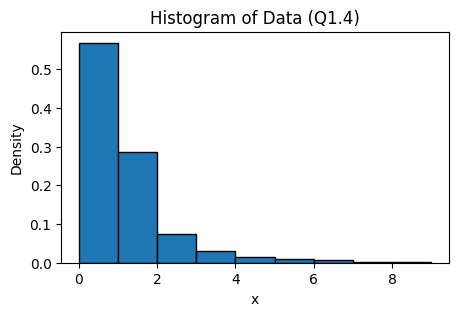

In [ ]:
## Supporting Codes -- DO NOT CHANGE
# Reading data
data = np.load("./Data/1_4/data_Q1_4.npy")
# Visualisation
plt.figure(figsize=(5, 3))
plt.xlabel("x")
plt.ylabel("Density")
plt.title("Histogram of Data (Q1.4)")
plt.hist(data, bins = np.arange(10), edgecolor = 'black', density = True)
plt.show()

### Task 1: Fitting the Pareto distribution (1 points).

First, we infer the parameters of the distributions that fit our data best. We start with the Pareto distribution. Notice that the CCDF of the Pareto distribution is $\bar{F}(x) = \left(\frac{x_m}{x}\right)^\alpha$. Then, by taking log on both sides, we have
$$ \log\left(\bar{F}(x)\right) =  - \alpha \log(x) + \alpha \log(x_m).$$ Hence, if we run linear regression with independent variable $\log(x)$ and dependent variable $\log\left(\bar{F}(x)\right)$, we will be able recover the parameters $x_m$ and $\alpha$. Your task is to implement the above method.

Hints:
- For any sample $x_i$ in the `data`, you can use the empirical CCDF (i.e. number of data points that is $\geq x_i$ divided by the total number of data) to serve as the observed CCDF $\bar{F}(x_i)$.
- You can use [scipy.stats.linregress](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html) to help you with the regression part.s

In [ ]:
from scipy.stats import linregress
def pareto_parameter_estimation(data) -> (float, float):

    # Placeholders for your answers
    #xm = 0
    #alpha = 0
    #TODO

    # Sort the data in asscending order
    sorted_data = np.sort(data)

    # Caculate the empirical CCDF
    n = len(data)
    ccdf = np.array([np.sum(data >= x) / n for x in sorted_data])

    #log transformation
    log_x = np.log(sorted_data)
    log_ccdf = np.log(ccdf)

    #linear regression: log(𝐹¯(𝑥))=−𝛼log(𝑥)+𝛼log(𝑥𝑚).
    slope, intercept, _,_,_ = linregress(log_x, log_ccdf)

    #Parameter estimation
    alpha = - slope
    xm = np.exp(intercept/alpha)


    # Do not change the order of the outputs
    return xm,alpha

If you implemented the above function correctly, the following plot should match with Figure 8.7 in our textbook of heavy tail distributions.

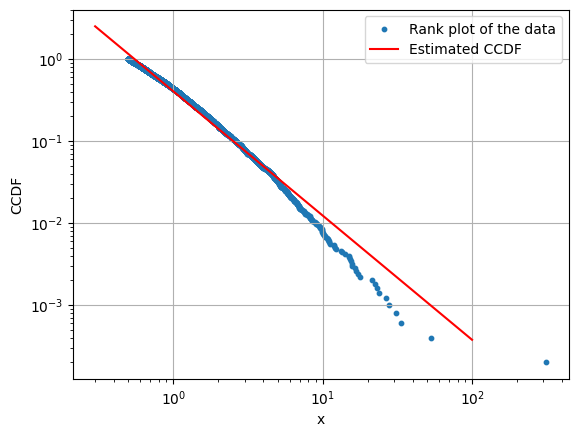

In [ ]:
# Supporting Cell for Plot generation
xm,alpha = pareto_parameter_estimation(data)
y = empirical_CCDF(data, data)
plt.xscale('log')
plt.yscale('log')
plt.scatter(data,y, s = 10 , label = "Rank plot of the data")
xaxis = np.linspace(0.3,100)
plt.plot(xaxis, (xm/xaxis)**alpha, c = 'r', label = "Estimated CCDF")
plt.xlabel("x")
plt.ylabel("CCDF")
plt.grid()
plt.legend()
plt.show()

### Task 2: Fitting the LogNormal distribution (0.5 points).
Another hypothesis is that the data are actually following the LogNormal distribution. To verify this, we also want to infer the parameters $\mu$ and $\sigma$ of the LogNormal distribution that is the best fit for the data. Complete the following function.

Hint: Suppose $X$ follows the LogNormal distribution with parameters $\mu, \sigma$, $\log(X)$ follows the normal distribution with the same parameters.

In [ ]:
def logNormal_parameter_estimation(data) -> (float, float):

   # Place holders for your answers
   #mu = 0
   #sigma = 0
   #TODO

   # Take the natural logarithm of the data
   log_data = np.log(data)

   # Estimate parameters 𝜇 and 𝜎
   mu = np.mean(log_data)
   sigma = np.std(log_data, ddof =1) #Use unbiased estimation

   # Do not change the order of the outputs
   return mu, sigma


### Task 3: Verifing Goodness of Fit (0.5 points).

Let's first look at the plots of the CCDFs of the distributions you just estimated. You may use the plots to verify whether parameter estimation functions are correctly implemented and tell which distribution might be the best fit.

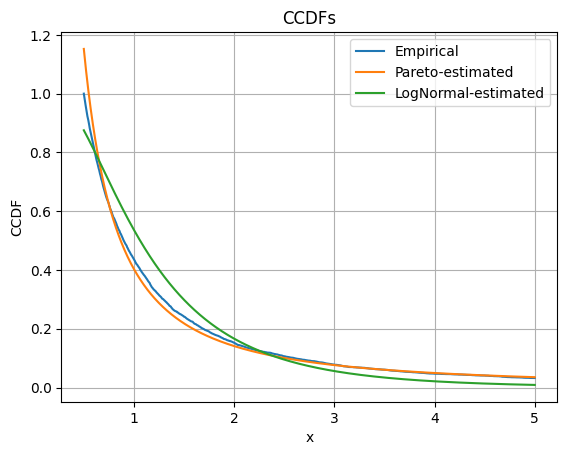

In [ ]:
# Supporting Codes that might be useful
def Pareto_CCDF(x, xm, alpha):
    return  (x/xm)**(-alpha)
def LogNormal_CCDF(x, mu, sigma):
    return 1 - stats.norm.cdf((np.log(x) - mu)/sigma)


xaxis = np.linspace(0.5, 5, 1000)
plt.plot(xaxis, empirical_CCDF(xaxis, data), label = "Empirical")
xm, alpha = pareto_parameter_estimation(data)
plt.plot(xaxis,Pareto_CCDF(xaxis, xm, alpha), label = "Pareto-estimated")
mu, sigma = logNormal_parameter_estimation(data)
plt.plot(xaxis,LogNormal_CCDF(xaxis, mu, sigma), label = "LogNormal-estimated")
plt.grid()
plt.legend()
plt.xlabel("x")
plt.ylabel("CCDF")
plt.title("CCDFs")
plt.show()

To be more rigorous, we could calculate the [Kolmogorov–Smirnov statistics](http://en.wikipedia.org/wiki/Kolmogorov%E2%80%93Smirnov_test) to see which distribution among these three is the best fit for the given data. Let's implement a function calculate the K-S statistics. You can find the formula in the wikipedia page.

In [ ]:
import math
def normal_cdf(x, mu=0, sigma =1):
  z =(x-mu) /sigma
  return 0.5 * (1+math.erf(z / math.sqrt(2)))


def KSStatisticPareto(data, xm, alpha) -> float:

    # Placeholders for your answers
    #KSPareto = 0
    #TODO
    n= len(data)
    sorted_data = np.sort(data)

    # Empirical CDF
    empirical_cdf = np.arange(1, n+1)/n

    #Theoretical Pareto CDF: F(x) = 1-(xm/x)^alpha for x>=xm
    theoretical_cdf = np.where(sorted_data >= xm, 1-(xm/sorted_data)**alpha,0)

    #Ks statistic is the maximum absolute difference
    KSPareto = np.max(np.abs(empirical_cdf-theoretical_cdf))


    return KSPareto

def KSStatisticLogNormal(data, mu, sigma) -> float:

    # Placeholders for your answers
    #KSPareto = 0
    #TODO
    n = len(data)
    sorted_data = np.sort(data)

    # Empirical CDF
    empirical_cdf = np.arange(1,n+1) /n

    #Theoretical LogNormal CDF: F(x) = Φ((ln(x) - μ)/σ)
    #Using the function normal_cdf
    theoretical_cdf = np.array([normal_cdf(np.log(x), mu, sigma) for x in sorted_data])

    KSLogNormal   = np.max(np.abs(empirical_cdf-theoretical_cdf))

    return KSLogNormal

# Supporting codes for printing things out
KSpareto = KSStatisticPareto(data, xm, alpha)
KSLogNormal = KSStatisticLogNormal(data, mu, sigma)
print("The K-S statistic of the data for Pareto distribution is "+ str(KSpareto))
print("The K-S statistic of the data for LogNormal distribution is "+ str(KSLogNormal))

The K-S statistic of the data for Pareto distribution is 0.09819715860038895
The K-S statistic of the data for LogNormal distribution is 0.1245987881237934


#### You should be able to answer which distribution is the best fit. Report your findings below:

TODO:

The Pareto distribution is a better fit.
There have two reason:
1. The K-S statistic of Pareto distribution is smaller(0.098197 < 0.1245).
2. The CCDF graph shows that the Pareto distribution fits better!


So, I will recommend to choose the Pareto distribution as the model for this data set!


### Task 4** (bonus question for both COMP4880/8880 students, 0.5 points)
You may have already observed that there exists some $m > 0$ such that all the data are in the interval $(m,\infty]$. The data in the interval $[0,m]$ is missing. However, the LogNormal distribution is actually defined in the interval $[0,\infty)$, which means that there's a problem of missing data in this interval. Assume that the datapoints in $[0,m]$ were erased on purpose (in contrast with the above implementation, where we assumed the data are missing by chance). And you want to recover the actual distributions based on the data you have currently. How to modify the parameter estimation method for the LogNormal distribution? Describe your answer (mathematically and/or empirically).

**Note:**
- It is not required to consider the missing data problem other than the bonus task.
- In order to get full marks, you should state your idea mathematically, test your method with data and evaluate whether the performance of the new data fitting scheme is better.

TODO:

<span><strong>Step1: Define the problem</span></strong>

The data set is truncated below a threshold m! So, standard LogNormal parameter estimation is biases.
<br>

<span><strong>Step2: Consider Truncated Maximum Likelihood Estimation</span></strong>
 1. likelihood function:
   
 2. Next, I will use numerical optimization to maximize the log-likelihood.



<span><strong>Step3: Check the Result</span></strong>
 1. compute the K-S statistic for the truncated model and then compare it with the original method!

 2. Finally, we can check the result! If the truncated model's K-S statistic is smaller, it fits bettter!





In [ ]:
from scipy.stats import norm
from scipy.optimize import minimize


def logNormal_truncated_MLE(data, m):
# Initial estimate (not considering truncation)
    log_data = np.log(data)
    mu_init = np.mean(log_data)
    sigma_init = np.std(log_data, ddof=1)

    # Define negative log likelihood function
    def neg_log_likelihood(params):
         mu, sigma = params
         if sigma <= 0:
              return np.inf # Constrain sigma > 0
         # Compute LogNormal PDF and CDF(m)
         log_pdf = -np.log(data) - np.log(sigma) - 0.5 * ((np.log(data) - mu)/sigma)**2
         cdf_m = norm.cdf((np.log(m) - mu) / sigma)
         # Avoid numerical problems (when cdf_m ≈ 1, 1 - cdf_m may be close to 0)
         if cdf_m >= 1 - 1e-10:
            return np.inf
         log_truncated = log_pdf - np.log(1 - cdf_m)
         return -np.sum(log_truncated)

    # Optimize (using initial values)
    result = minimize(
    neg_log_likelihood,
    x0=[mu_init, sigma_init],
    bounds=[(None, None), (1e-9, None)] # sigma > 0
    )
    mu_hat, sigma_hat = result.x
    return mu_hat, sigma_hat


# Calculate the truncated K-S statistic
def KS_TruncatedLogNormal(data, mu, sigma, m):
  sorted_data = np.sort(data)
  n = len(data)
  empirical_cdf = np.arange(1,n+1)/n

  #Truncation correction
  cdf_m = norm.cdf((np.log(m) - mu) / sigma)
  theoretical_cdf = [
        (norm.cdf((np.log(x) - mu)/sigma) - cdf_m) / (1 - cdf_m)
        for x in sorted_data
  ]
  theoretical_cdf = np.array(theoretical_cdf)

  KS = np.max(np.abs(empirical_cdf - theoretical_cdf))
  return KS

m = np.min(data)
mu_trunc, sigma_trunc = logNormal_truncated_MLE(data, m)
KS_trunc = KS_TruncatedLogNormal(data, mu_trunc, sigma_trunc, m)

# K-S statistic of the original method
mu_orig, sigma_orig = logNormal_parameter_estimation(data)
KS_orig = KSStatisticLogNormal(data, mu_orig, sigma_orig)


print(f"Original method K-S statistic: {KS_orig:.4f}")
print(f"Truncation correction method K-S statistic: {KS_trunc:.4f}")


Original method K-S statistic: 0.1246
Truncation correction method K-S statistic: 0.0078


<span><strong>Summary:</span></strong>

1. As we can see,the output is:
Original method K-S statistic: 0.1246
Truncation correction method K-S statistic: 0.0078


2. Standard LogNormal parameter estimation is biased for data truncated below a threshold m.

By using truncated maximun likelihood extimation, parameter estimates are much more accurete and the K-S value drops by more than 90%. This output prove that this method effectively solves the missing data problem!

# Problem 2: Graph Spectrum

## Problem 2.1: Eigen Values and Eigen Vectors (2.5 points)

In this question, you are required to construct different graph structures from the data provided in the file `Data/2_1/X_data.txt`, compute their corresponding graph Laplacian matrices, and perform spectral analysis through eigen decomposition. Please follow the instructions below to complete the programming tasks and answer the questions.

In [ ]:
# Import Libraries
# You are not allowed to use any additional libraries, except "from sklearn.neighbors import NearestNeighbors" (not recommanded)
import numpy as np
import matplotlib.pyplot as plt
from Utils import plot_eigs

# Load Data
X = np.loadtxt("Data/2_1/X_data.txt")
N = len(X)

In [ ]:
print(N)
print(X)

200
[0.60806598 0.61734395 0.65501643 0.71505036 0.71753926 0.73436279
 0.75583127 0.76980128 0.78845781 0.79743378 0.81839518 0.87965868
 0.87987226 0.88754249 0.89112346 0.90610512 0.90685405 0.90731646
 0.94166125 0.95316933 0.95317261 0.95484474 0.97234714 0.99730056
 1.01350564 1.02218452 1.03937225 1.04177272 1.04839245 1.06284947
 1.0751396  1.09934283 1.10851201 1.12953771 1.15348695 1.16450898
 1.29312975 1.30460597 1.31584256 1.37045564 2.47605098 2.60248622
 2.64739197 2.7042956  2.76075868 2.77873301 2.8321565  2.85603116
 2.8646156  2.87097605 2.90416515 2.90787225 2.92298354 2.93815752
 2.93977926 2.94019853 2.9628682  2.97687034 2.98559798 2.99283479
 3.01740941 3.01835216 3.03427366 3.06481679 3.06625269 3.06872366
 3.07227912 3.07232721 3.12233526 3.14769332 3.16250516 3.1643805
 3.18625602 3.19510903 3.20070658 3.2061999  3.21142445 3.27124801
 3.30760731 3.31292873 4.61624576 4.70729701 4.71692585 4.76626439
 4.83830128 4.83954455 4.85958938 4.89404796 4.89634596 4.8

### Task 1: Graph Construction. (1.0 points)

Complete the functions for constructing the following two types of graph structures:
- Mutual k-Nearest Neighbor Graph;
- Fully-connected Graph, using the Gaussian similarity function as the weight function.

In [ ]:
def gaussian_similarity(a, b, sigma):
    """1D Gaussian similarity function."""
    # TODO:
    return np.exp(-np.square(a-b) /(2 * sigma **2))


In [ ]:
def build_knn_graph(X, k, sigma):
    """
    Construct a mutual kNN graph and return the NxN weight matrix W.

    Parameters
    ----------
    X : ndarray of shape (N,) or (N, d)
        Dataset. If one-dimensional, shape=(N, ). If multi-dimensional, can be
        extended for subsequent logic.
    k : int
        Number of neighbors for each point.
    sigma : float
        Parameter for the Gaussian similarity kernel.
    method :
        mutual kNN graph (an edge is created only if both sides are neighbors)

    Returns
    -------
    W : ndarray of shape (N, N)
        Symmetric weight matrix.
    """
    # TODO:
    N = len(X)
    W = np.zeros((N, N))


    # Find the k nearest neighbors of each point
    distances = np.abs(X.reshape(-1, 1) - X.reshape(1, -1)) # N x N distance matrix
    knn_indices = np.argsort(distances, axis=1)[:, 1:k+1] # Exclude the first k nearest neighbors after itself


    # Build adjacency relationship
    for i in range(N):
       for j in knn_indices[i]:
           if i in knn_indices[j]: # Mutual neighbors
                sim = gaussian_similarity(X[i], X[j], sigma)
                W[i, j] = sim
                W[j, i] = sim # Ensure symmetry

    return W

In [ ]:
def build_full_graph(X, sigma=1.0):
    """
    Construct the fully-connected graph weight matrix W (NxN).
    """
    # TODO:
    N = len(X)
    W = np.zeros((N, N))


    for i in range(N):
        for j in range(i+1, N): # Only traverse the upper triangle
            sim = gaussian_similarity(X[i], X[j], sigma)
            W[i, j] = sim
            W[j, i] = sim # Symmetric matrix


    return W

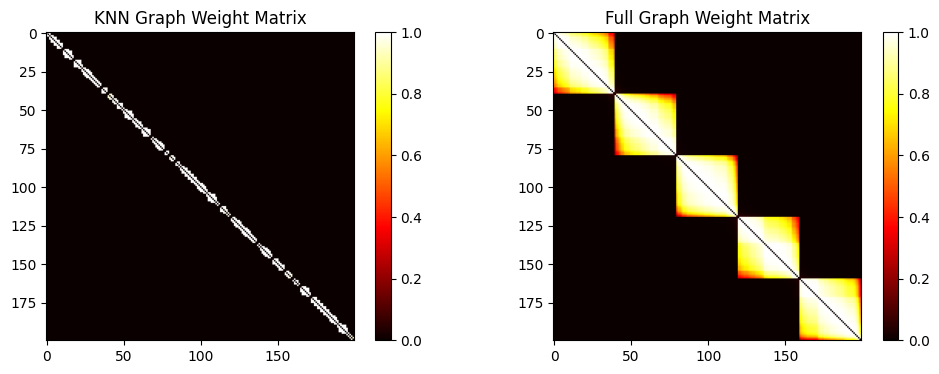

In [ ]:
# Test what it look like first!

Test_X = np.loadtxt("Data/2_1/X_data.txt")

# Parameter setting
k = 5
sigma = 0.5

# Build weight matrix
W_knn_Test = build_knn_graph(Test_X, k=k, sigma=sigma)
W_full_Test = build_full_graph(Test_X, sigma=sigma)

# Visualize KNN graph
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.title("KNN Graph Weight Matrix")
plt.imshow(W_knn_Test, cmap='hot')
plt.colorbar()

# Visualize Full Graph
plt.subplot(1, 2, 2)
plt.title("Full Graph Weight Matrix")
plt.imshow(W_full_Test, cmap='hot')
plt.colorbar()

plt.show()

### Task 2: Graph Laplacian Matrix Computation (0.2 points)

Complete the functions for computing the following Laplacian matrix:
- Unnormalized Laplacian matrix ($L_{\text{unnorm}}$);
- Random walk Laplacian matrix ($L_{\text{rw}}$).

In [ ]:
def compute_laplacians(W):
    """
    Given the weight matrix W, return (L_unnorm, L_rw).
    """
    # TODO:

    # Calculate degree matrix
    degrees = np.sum(W, axis=1)
    if np.any(degrees == 0):
        raise ValueError("There is an isolated node (degree is zero), L_rw cannot be calculated.")





    D = np.diag(np.sum(W, axis=1)) # Calculate degree matrix D
    L_unnorm = D - W # Unnormalized Laplace

    D_inv = np.linalg.inv(D) # D is a diagonal matrix, directly invert
    L_rw = np.eye(W.shape[0]) - D_inv @ W # Random walk Laplace

    #For check:
    #print(L_unnorm.shape, L_rw.shape) # Print matrix dimensions: should be (N, N)
    #assert np.allclose(L_unnorm, L_unnorm.T), "L_unnorm is not a symmetric matrix"
    #print("L_unnorm[:5, :5] =\n", L_unnorm[:5, :5]) # Print part of the matrix to view the structure



    return L_unnorm, L_rw

In [ ]:
# Use for testing
W_test = np.array([[0, 0.5, 0.5],
                  [0.5, 0, 0.5],
                  [0.5, 0.5, 0]])
L_unnorm, L_rw = compute_laplacians(W_test)

print(f"{L_unnorm}{L_unnorm}")
print(f"{L_rw}{L_rw}")

[[ 1.  -0.5 -0.5]
 [-0.5  1.  -0.5]
 [-0.5 -0.5  1. ]][[ 1.  -0.5 -0.5]
 [-0.5  1.  -0.5]
 [-0.5 -0.5  1. ]]
[[ 1.  -0.5 -0.5]
 [-0.5  1.  -0.5]
 [-0.5 -0.5  1. ]][[ 1.  -0.5 -0.5]
 [-0.5  1.  -0.5]
 [-0.5 -0.5  1. ]]


In [ ]:
# Use for testing
 #(ValueError: There is an isolated node (degree is zero), L_rw cannot be calculated.)
W_test = np.array([[0, 0, 0],
                  [0, 0, 0],
                  [0, 0, 0]])
#L_unnorm, L_rw = compute_laplacians(W_test)

#print(f"{L_unnorm}{L_unnorm}")
#print(f"{L_rw}{L_rw}")

### Task 3: Eigenvalue and Eigenvector (0.3 points)

Complete the functions for performing eigen decomposition of the above Laplacian matrices.

In [ ]:
def eigen_decompose(L):
    """
    Compute the eigenvalues and eigenvectors of L, then sort them in ascending
    order of eigenvalues, returning (vals, vecs).
    """
    # TODO:
    if np.allclose(L, L.T): # Check if it is symmetric
          vals, vecs = np.linalg.eigh(L) # Use eigh for symmetric matrices
    else:
          vals, vecs = np.linalg.eig(L) #  Use eig for asymmetric matrices


    # Convert complex numbers to real numbers (if the imaginary part can be ignored)
    vals = np.real_if_close(vals)
    vecs = np.real_if_close(vecs)

    # Force eigenvalues ​​to be non-negative (for matrices that should be non-negative in theory)
    #vals = np.clip(vals, a_min=0, a_max=None) # Truncate negative values ​​to 0



    # Sort by eigenvalue in ascending order
    sorted_indices = np.argsort(vals)
    vals = vals[sorted_indices]
    vecs = vecs[:, sorted_indices]

    #print(f"{vals:}{vals}" )
    #print(f"{vecs:}{vecs}" )


    return vals, vecs

### Task 4: Execution Flow (0.4 points)

Please make appropriate use of the function above to construct both a mutual kNN graph and a fully connected graph from the data (with $k = 9$ for the kNN graph and $\sigma = 1.0$ as the parameter for the Gaussian similarity function). For each of the two graphs, compute both the unnormalized Laplacian matrix and the random walk Laplacian matrix. Then, plot the first 10 eigenvalues and the first 5 eigenvectors for each Laplacian matrix (The code for the plotting part has already been provided). **Please note: Even if the function itself is correct, improper usage or incorrect function calls may still result in loss of marks. Other problems follow the same logic.**

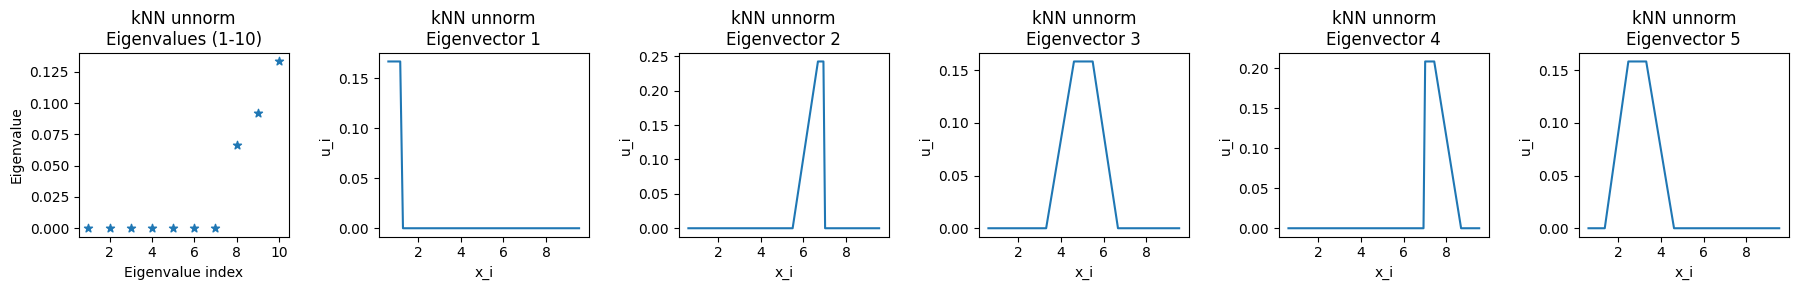

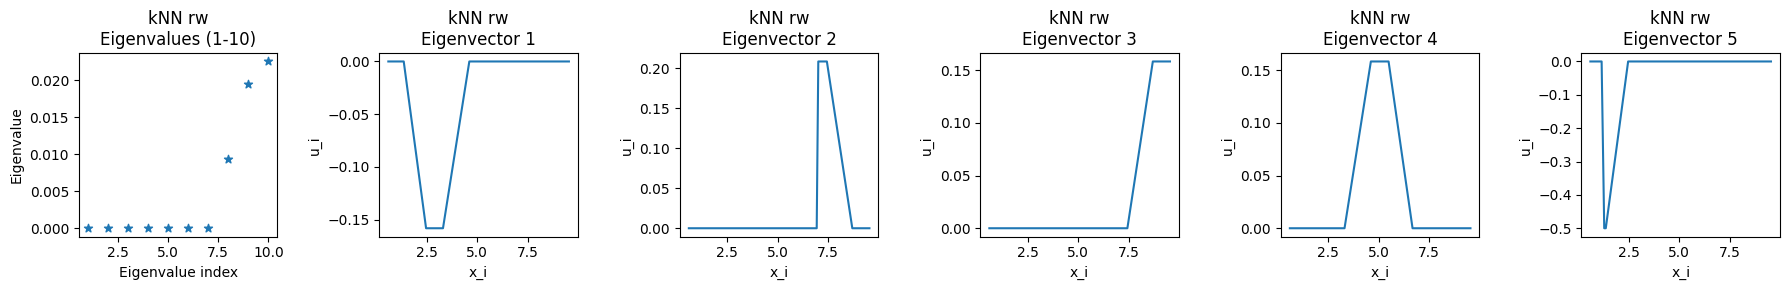

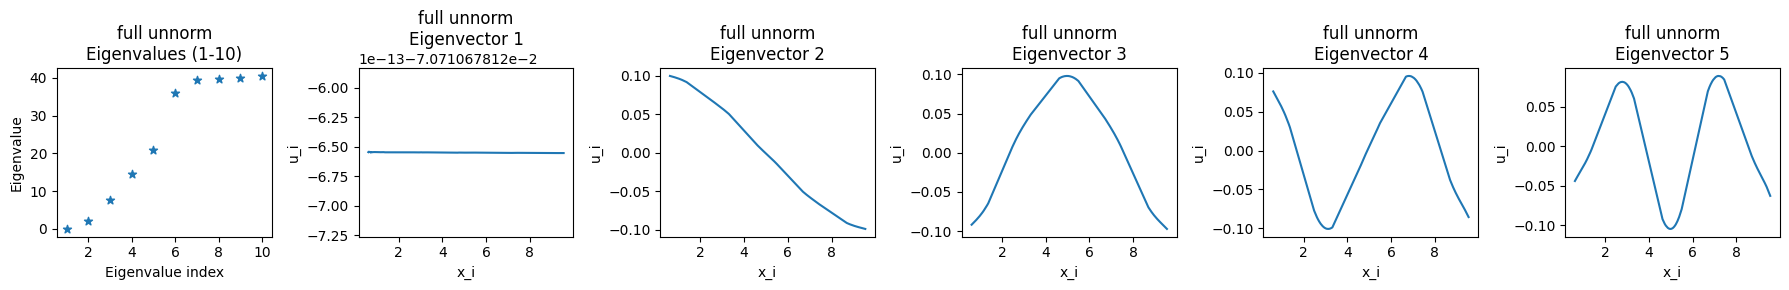

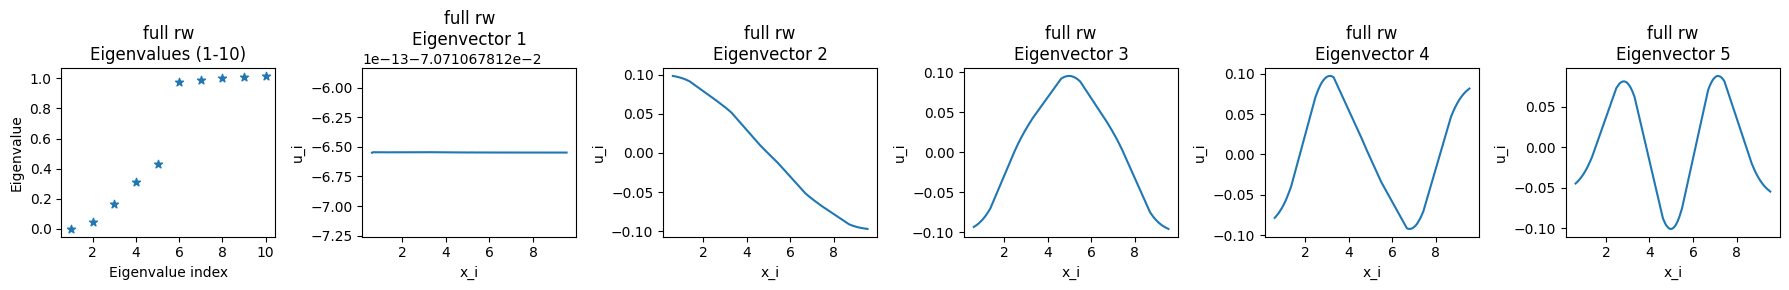

In [ ]:
k = 9
sigma = 1.0

# 1) mutual kNN graph
# build the graph and get the eigen-values/eigen-vectors
# TODO:
W_knn = build_knn_graph(X, k, sigma)

# Laplacian matrix
L_knn_unnorm, L_knn_rw = compute_laplacians(W_knn)

# Decompose the function
vals_knn_unnorm, vecs_knn_unnorm = eigen_decompose(L_knn_unnorm)
vals_knn_rw, vecs_knn_rw = eigen_decompose(L_knn_rw)





# 2) Fully-connected graph
# build the graph and get the eigen-values/eigen-vectors
# TODO:
W_full = build_full_graph(X, sigma)

# Laplacian matrix
L_full_unnorm, L_full_rw = compute_laplacians(W_full)

# Decompose the function
vals_full_unnorm, vecs_full_unnorm = eigen_decompose(L_full_unnorm)
vals_full_rw, vecs_full_rw = eigen_decompose(L_full_rw)


# Plot knn unnorm in the figure: Set the figure title to "kNN unnorm".
# You may replace `'vals_knn_unnorm'` and `'vecs_knn_unnorm'` with your own variable names. Please keep the other parts unchanged.
fig, axs = plt.subplots(1, 6, figsize=(18, 3))
plot_eigs(axs[0], axs[1:], vals_knn_unnorm, vecs_knn_unnorm, X, "kNN unnorm", 10, 5)
plt.tight_layout()

# Plot knn rw in the figure: Set the figure title to "kNN rw".
# You may replace `'vals_knn_rw'` and `'vecs_knn_rw'` with your own variable names. Please keep the other parts unchanged.
fig, axs = plt.subplots(1, 6, figsize=(18, 3))
plot_eigs(axs[0], axs[1:], vals_knn_rw, vecs_knn_rw, X, "kNN rw", 10, 5)
plt.tight_layout()

# Plot the full unnorm in the figure: Set the figure title to "full unnorm".
# You may replace `'vals_full_unnorm'` and `'vecs_full_unnorm'` with your own variable names. Please keep the other parts unchanged.
fig, axs = plt.subplots(1, 6, figsize=(18, 3))
plot_eigs(axs[0], axs[1:], vals_full_unnorm, vecs_full_unnorm, X, "full unnorm", 10, 5)
plt.tight_layout()

# Plot the full rw in the figure: Set the figure title to "full rw".
# You may replace `'vals_full_rw'` and `'vecs_full_rw'` with your own variable names. Please keep the other parts unchanged.
fig, axs = plt.subplots(1, 6, figsize=(18, 3))
plot_eigs(axs[0], axs[1:], vals_full_rw, vecs_full_rw, X, "full rw", 10, 5)
plt.tight_layout()

plt.show()

### Task 5: Analytical Questions (0.6 points)

1. How do different graph structures (mutual kNN vs. fully-connected) affect the distribution/value of the Laplacian matrices' eigenvalues and eigenvectors?

TODO:
1. Mutual kNN

  (a.) Eigenvalue: Small and close to zero (such as 0.000, 0.025), indicating that there are multiple connected components in the graph, which may correspond to multiple clusters.

  (b.) Eigenvector: Highlights local structure, for example eigenvector 1 shows clear separation, which is good for capturing local clustering.

2. Fully-connected

  (a.) Eigenvalue: The range is wide, reflecting global connectivity, but the distribution is smooth and it is difficult to distinguish clusters.
  
  (b.) Eigenvector: The distribution is complex and there is no obvious separation pattern. This may be due to the Gaussian kernel parameter (σ=1.0), which causes the weights to be too uniform and obscures the clustering structure.

2. By analyzing the eigenvalues and eigenvectors of the kNN and fully-connected graphs you get, try to find how many clusters exist in the data from at least 2 perspectives. Do you find any contradictions? From an algorithmic perspective, what might be the cause of the results' inconsistency?

TODO:

<span><strong>Step1:Differences in graph structure  </span></strong>

The kNN graph emphasizes local neighbor relationships and is sensitive to cluster boundaries; the fully connected graph is affected by the global Gaussian kernel and may smooth the cluster boundaries.
<br>

<span><strong>Step2:
Parameter sensitivity </span></strong>

The σ=1.0 of the fully connected graph may not adapt to the data scale, resulting in an overly uniform weight distribution.
<br>

<span><strong>Step3:  Algorithm limitations</span></strong>

The numerical instability of the random walk Laplacian matrix (asymmetric) may cause negative eigenvalues ​​(such as -0.15 in kNN rw), interfering with cluster analysis.






---

## Problem 2.2: Clustering and Partitioning (3.0 points)

In this question, you will use graph spectrum as a tool to distinguish graphs of different structures (community/cluster structure, partite structure). By reordering the nodes, visualize the adjacency matrix using a Dot Matrix Plot (similar to page 4 of the Lecture on Graph Spectrum). Please follow the instructions below to complete the programming tasks and answer the questions.

In [ ]:
# Import Libraries
import random
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from collections import deque
from sklearn.cluster import KMeans
from Utils import read_graph_from_files, plot_adjacency_matrix

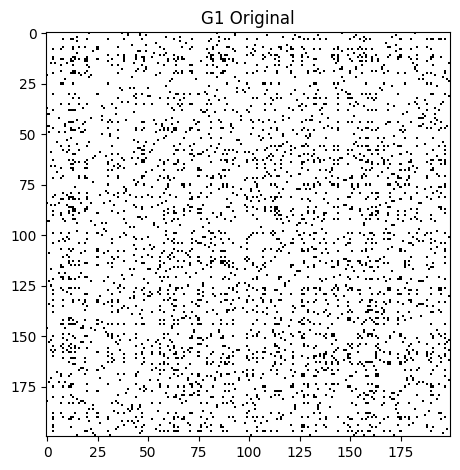

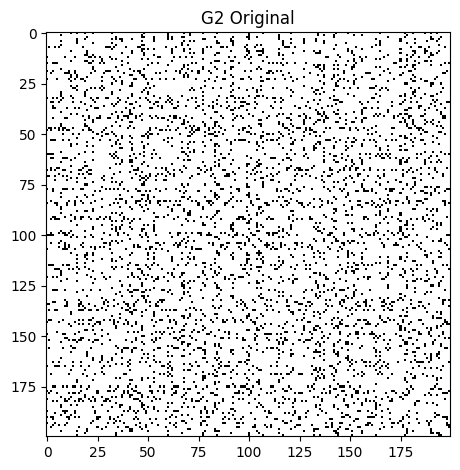

In [ ]:
# Filenames
G1_nodes_file = "Data/2_2/G1_nodes.txt"
G1_edges_file = "Data/2_2/G1_edges.txt"
G2_nodes_file = "Data/2_2/G2_nodes.txt"
G2_edges_file = "Data/2_2/G2_edges.txt"

# 1) Read graph
G1 = read_graph_from_files(G1_nodes_file, G1_edges_file)
G2 = read_graph_from_files(G2_nodes_file, G2_edges_file)

# 2) Visualize the original graph
plot_adjacency_matrix(G1, title="G1 Original")
plot_adjacency_matrix(G2, title="G2 Original")

### Task 1: Determine the type of graph structure. (1.0 points)

Please determine whether G1 and G2 exhibit a community structure or a partite structure based on the eigenvalues of their adjacency matrix or Laplacian matrix, respectively. In this step, you only need to determine whether each graph is bipartite. You can also try to plot eigenvalues to see what the eigenvalues are (not necessarily plot all eigenvalue).

Do not assume “it’s not bipartite, so it must be a two-cluster graph”. You need to independently implement the logic for both structural identifications based on their definitions and mathematical formulations. This means you should not directly call library functions that identify bipartite or community structures.

In [ ]:
def check_community_by_eigenvalues(G, tol=1e-3):
    """
    Determine whether graph G has a community structure.

    Parameters:
      G: NetworkX graph.
      tol: Tolerance for comparing.

    Returns:
      has_communities: Boolean; True if more than one eigenvalue is below tol.
      num_communities: Predicted number of communities (equal to the number of eigenvalues < tol, use the tol give here).
      eigenvalues: The sorted array of eigenvalues.
    """
    #TODO:
     # 1. Computational graph Laplacian matrix
    L = nx.laplacian_matrix(G).todense()

    # 2. Compute eigenvalues ​​(efficient algorithm using symmetric matrices)
    eigenvalues = np.linalg.eigvalsh(L)
    eigenvalues.sort()

    # 3. Determine how many eigenvalues ​​< tol (which stands for "approximately 0"）
    num_communities = np.sum(eigenvalues < tol)

    # 4. If there is more than one eigenvalue close to 0,
    #it means there may be multiple communities
    has_communities = num_communities > 1



    if has_communities:
        print("The graph appears to have community structure with {} communities.".format(num_communities))
    else:
        print("The graph does not appear to have a clear community structure.")

    return has_communities, num_communities, eigenvalues

In [ ]:
def check_bipartite_by_eigenvalues(G, tol=1e-5):
    """
    Determine whether graph G is bipartite using the spectral properties.

    Parameters:
      G: NetworkX graph.
      tol: Tolerance for comparing (use the tol given here).

    Returns:
      is_bipartite: Boolean;
      eigenvalues: The sorted array of eigenvalues.
    """
    # TODO:
    # 1. Calculate the adjacency matrix
    A = nx.adjacency_matrix(G).todense()

    # 2. Calculate eigenvalues ​​and sort
    eigenvalues = np.linalg.eigvalsh(A)
    eigenvalues.sort()

    # 3. Check if the eigenvalues ​​are symmetric about 0 (i.e. every λ ≈ -λ)
    is_bipartite = np.allclose(eigenvalues, -eigenvalues[::-1], atol=tol)


    if is_bipartite:
        print("The graph appears to be bipartite.")
    else:
        print("The graph does not appear to be bipartite.")

    return is_bipartite, eigenvalues

In [ ]:
# Spectral community structure analysis for G1
print("============ Analyzing Community Structure for G1 ============")
has_comm_G1, num_comms_G1, lap_eigs_G1 = check_community_by_eigenvalues(G1)

# Spectral community structure analysis for G2
print("============ Analyzing Community Structure for G2 ============")
has_comm_G2, num_comms_G2, lap_eigs_G2 = check_community_by_eigenvalues(G2)

# Spectral bipartite analysis for G1
print("============ Analyzing Bipartiteness for G1 ============")
is_bip_G1, adj_eigs_G1 = check_bipartite_by_eigenvalues(G1)

# Spectral bipartite analysis for G2
print("============ Analyzing Bipartiteness for G2 ============")
is_bip_G2, adj_eigs_G2 = check_bipartite_by_eigenvalues(G2)

============ Analyzing Community Structure for G1 ============
The graph appears to have community structure with 3 communities.
============ Analyzing Community Structure for G2 ============
The graph does not appear to have a clear community structure.
============ Analyzing Bipartiteness for G1 ============
The graph does not appear to be bipartite.
============ Analyzing Bipartiteness for G2 ============
The graph appears to be bipartite.


### Task 2: Recover the block structure and visualize. (2.0 points)

After determining the structure of each graph, reorder its nodes and generate a Dot Matrix Plot of the recovered adjacency matrix (similar to page 4 of the lecture of Graph Spectrum).

You must implement the functionality of community structure based on Graph Spectrum theory. For bipartie graph, design an algorithm to recover its bipartite block structure. there is no expectation that such an algorithm has to use graph spectrum. *Hint:* for bipartite graphs, consider how to partition the nodes based on the definition of bipartiteness, you may need to use search algorithms you learned in the Algorithms course.

In the returned dot matrix plot, the blocks should be ordered from left to right in ascending order of size. Also, return a list indicating the size (number of nodes) of each community or partition. After completing the code, you need to briefly explain why your algorithm is able to successfully recover the structure (you may use formulas to support your explanation if necessary). You are still not allowed to directly call any library functions that perform the reordering or structural recovery.

In [ ]:
def recover_blocks_community(G, num_communities, plot=True):
    """
    Recover the block structure of a community graph G using spectral clustering.

    Parameters:
      G: NetworkX graph assumed to have community structure.
      num_communities: The number of communities (blocks) to recover.
      plot: If True, plot the reordered adjacency matrix.

    Returns:
      labels: Dictionary mapping each node to its community label.
      ordering: List of nodes reordered so that blocks are arranged in ascending order by block size.
      block_sizes: List of sizes (number of nodes) for each block in the ordering.
    """
    # TODO:
    # Get the node list and calculate the Laplacian matrix
    nodes = list(G.nodes())
    L = nx.laplacian_matrix(G).todense()

    # Calculate eigenvectors (take the first num_communities)
    _, eigvecs = np.linalg.eigh(L)
    features = eigvecs[:, :num_communities]

    # USE KMeans
    kmeans = KMeans(n_clusters=num_communities, n_init='auto')
    labels_array = kmeans.fit_predict(features)

    # label
    labels = {node: int(labels_array[i]) for i, node in enumerate(nodes)}


    block_nodes = {i: [] for i in range(num_communities)}
    for node, label in labels.items():
        block_nodes[label].append(node)


    sorted_blocks = sorted(block_nodes.items(), key=lambda x: len(x[1]))
    ordering = [node for _, nodes_in_block in sorted_blocks for node in nodes_in_block]
    block_sizes = [len(nodes_in_block) for _, nodes_in_block in sorted_blocks]



    if plot:
        plot_adjacency_matrix(G, node_order=ordering,
                              title="Reordered Adjacency Matrix (Community Blocks Sorted by Size)")

    print("Community block structure recovered. Blocks sorted (ascending size):")
    for i, size in enumerate(block_sizes):
        print("  Block {}: size {}".format(i, size))

    return labels, ordering, block_sizes

In [ ]:
def recover_blocks_bipartite(G, plot=True):
    """
    Recover the bipartite block structure of graph G by manually checking bipartiteness with search algorithm.

    Parameters:
      G: NetworkX graph assumed to be bipartite.
      plot: If True, plot the reordered adjacency matrix.

    Returns:
      labels: Dictionary mapping each node to its block ID (0, 1, 2, ...).
      ordering: List of nodes reordered so that blocks are arranged in ascending order by size.
      block_sizes: List of block sizes corresponding to the ordering.

    If any connected component is not bipartite (e.g., due to an odd cycle), the function returns (None, None, None)
      and prints an error message.
    """
    # TODO:
    color = {}
    for start in G.nodes():
        if start not in color:
            queue = deque([start])
            color[start] = 0
            while queue:
                u = queue.popleft()
                for v in G.neighbors(u):
                    if v in color:
                        if color[v] == color[u]:
                            print("Error:There are odd cycles in the graph, and it cannot form a bipartite graph!")
                            return None, None, None
                    else:
                        color[v] = 1 - color[u]
                        queue.append(v)

    # block
    block_0 = [n for n, c in color.items() if c == 0]
    block_1 = [n for n, c in color.items() if c == 1]

    blocks = [block_0, block_1]
    sorted_blocks = sorted(blocks, key=len)
    ordering = sorted_blocks[0] + sorted_blocks[1]
    block_sizes = [len(b) for b in sorted_blocks]
    labels = {n: i for i, block in enumerate(sorted_blocks) for n in block}


    if plot:
        plot_adjacency_matrix(G, node_order=ordering,
                              title="Reordered Adjacency Matrix (Bipartite Blocks Sorted by Size)")

    print("Bipartite block structure recovered. Blocks sorted (ascending size):")
    for i, size in enumerate(block_sizes):
        print("  Block {}: size {}".format(i, size))

    return labels, ordering, block_sizes


Recovering block structure for community graph G1...


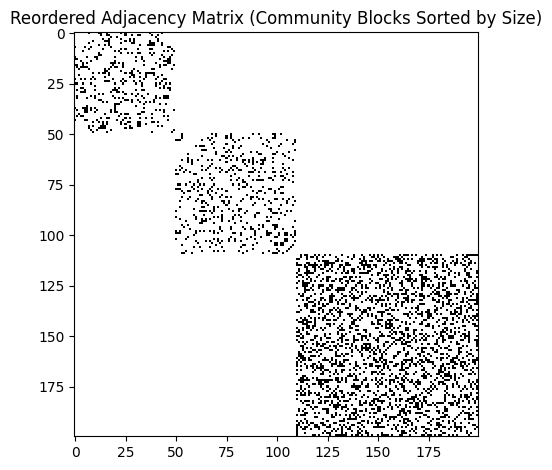

Community block structure recovered. Blocks sorted (ascending size):
  Block 0: size 50
  Block 1: size 60
  Block 2: size 90

Recovering block structure for bipartite graph G2...


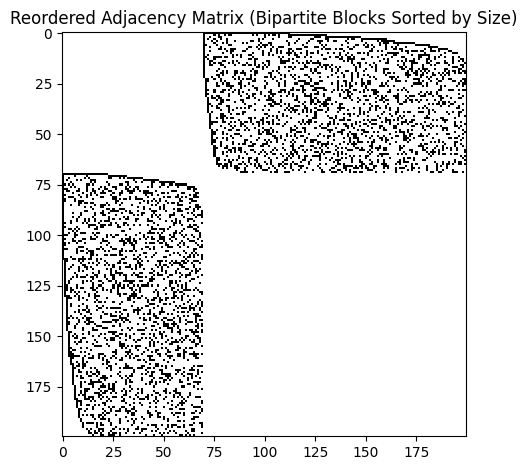

Bipartite block structure recovered. Blocks sorted (ascending size):
  Block 0: size 70
  Block 1: size 130


In [ ]:
# Recover block structure for community and bipartite graph
# TODO:
# Recover block structure for community graph. Replace 'i' with correct graph number
#num_communities =
#print("\nRecovering block structure for community graph G_i...")
#comm_labels, comm_ordering, comm_block_sizes = recover_blocks_community(Gi, num_communities, plot=True)

# Recover block structure for bipartite graph. Replace 'i' with correct graph number
#print("\nRecovering block structure for bipartite graph G_i...")
#bip_labels, bip_ordering, bip_block_sizes = recover_blocks_bipartite(Gi, plot=True)


# ====== G1 ======
num_communities = 3  # FROM TASK 1

print("\nRecovering block structure for community graph G1...")
comm_labels, comm_ordering, comm_block_sizes = recover_blocks_community(G1, num_communities, plot=True)


# ====== G2 ======
print("\nRecovering block structure for bipartite graph G2...")
bip_labels, bip_ordering, bip_block_sizes = recover_blocks_bipartite(G2, plot=True)


1. **Why your algorithm is able to successfully recover the structure?**

TODO:

1. Recover of the G1 structure:

  (a. The way to recover:) The spectral properties of the Laplacian matrix are used. The number of zero eigenvalues of the Laplacian matrix is equal to the number of connected components of the graph. The eigenvector corresponding to the non-zero minimum eigenvalue can map the nodes to a low-dimensional space, where nodes in the same community gather.

  (b. The way to implement:) The eigenvectors of the first k smallest eigenvalues (k=3) were extracted and the communities were divided using KMeans clustering.

  (c. The ouput analysis:) The reordered adjacency matrix(as you can see above G1 recover picture!) shows a diagonal block structure, with dense populations within blocks and sparse populations between blocks, which is consistent with the community characteristics.
  

2. Recover of the G2 structure:

  (a. The way to recover:) The eigenvalues of the adjacency matrix of a bipartite graph are symmetrically distributed (λ and -λ are paired), and can be verified to be non-strange by BFS coloring

  (b. The way to implement:) Mark the nodes alternately with two colors. If the coloring is successful (no adjacent nodes of the same color), they are divided into two blocks.
  
  (c. The ouput analysis:) The reordered adjacency matrix(as you can see above G2 recover picture!) shows the off-diagonal block structure, with dense connections between the two blocks and no connections within the blocks, which meets the definition of a bipartite graph.

### Task 3* (compulsory for COMP8880, optional for COMP4880) (1.0 points)

We have explored bipartite graphs above. Now, we will take it a step further and work with *k-partite graphs*. A *k-partite graph* is defined as a graph whose nodes can be partitioned into *k disjoint sets*, such that:
- There are *no edges within each set* (i.e., each is an independent set),
- Edges may exist *between nodes in different sets*.

Try to recover the block structure of the adjacency matrix of a shuffled *k-partite graph*, such that the blocks appear in ascending order of size from left to right. An example is shown in the `Figures/graph_comparison.png`. Also briefly explain your algorithm. You should implement the algorithm themselves and should not use library functions that directly implement the core logic.

The graph you need to work with is provided in `Data/2_2/G3_nodes.txt` and `G3_edges.txt`, where the first column in `G3_nodes.txt` represents the node ID and the second column represents the color ID. You are not allowed to use the color ID for recovery. The color information is provided only to help you visually verify whether you have correctly recovered the components.

*Hints*: you may need to use heuristic algorithm you learned in the Algorithms course.

<img src="Figures/graph_comparison.png" alt="Image" width="600"/>

In [ ]:
from Utils import read_graph_from_files_with_color, color_adjacency_matrix

In [ ]:
from collections import deque
def recover_graph(G):
    """
    You may modify the definition of this function.
    """
    # TODO:
    nodes = list(G.nodes())
    n = len(nodes)


    # Step 1
    color = {}
    for node in sorted(nodes):
        neighbor_colors = set()
        for neigh in G.neighbors(node):
            if neigh in color:
                neighbor_colors.add(color[neigh])
        #
        for c in range(n):
            if c not in neighbor_colors:
                color[node] = c
                break


    # Step 2
    color_groups = {}
    for node, c in color.items():
        if c not in color_groups:
            color_groups[c] = []
        color_groups[c].append(node)


    # Step 3
    sorted_blocks = sorted(color_groups.items(), key=lambda x: len(x[1]))
    ordering = [node for _, group in sorted_blocks for node in group]
    block_sizes = [len(group) for _, group in sorted_blocks]
    k = len(sorted_blocks)

    # Step 4
    A = nx.adjacency_matrix(G, nodelist=ordering).todense()
    color_vector = np.array([color[node] for node in ordering])



    return A, k, color_vector

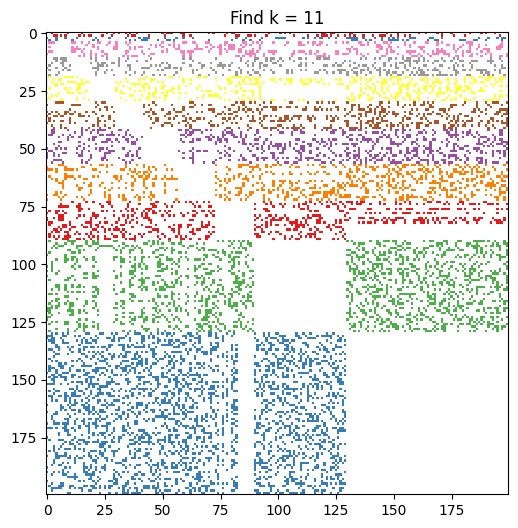

In [ ]:
G3 = read_graph_from_files_with_color("Data/2_2/G3_nodes.txt", "Data/2_2/G3_edges.txt")
A, k, color_vector = recover_graph(G3)
A_colored = color_adjacency_matrix(A, color_vector)

plt.figure(figsize=(6, 6))
plt.imshow(A_colored.astype(np.uint8), interpolation='none')
plt.title(f"Find k = {k}")
plt.show()

1. **Why your algorithm is able to successfully recover the structure?**

TODO:

The algorithm identifies independent sets through greedy coloring, restores the block structure through grouping and sorting, and strictly relies on the mathematical definition of the k-partite graph. The visualization results of the final adjacency matrix (such as k=11 and block features) directly verify the correctness of the algorithm.



---

## Problem 2.3: Estimate point location from affinity matrices (3.5 points)

In this problem, you will be given the affinity matrices `A` and `B` which are generated by 100 2D data points. Your task is to recover the exact coordinates of these data points.

### Task 1: Fully obeserved affinity matrix (1.5 points)
In this task, we consider a complete $n\times n$ affinity matrix $A$ with $A_{i,j} = \exp\left(-\Vert x_i - x_j \Vert_2^2\right)$. In the following block, we will implement the recovery procedure for the problem. `A` is an $200\times 200$ affinity matrix defined as above. You are given the exact coordinates of two points $x_1 = (0.1,0.5), x_2 = (-0.2, -0.2), x_3 = (0.3, 0.2)$. Your goal is to recover the remaining 197 points.

Hint:
1. Prove that $\Vert x_1 - x_i \Vert_2^2 + \Vert x_1 - x_j \Vert_2^2 - \Vert x_i - x_j \Vert_2^2 = 2(x_1 - x_i)^T(x_1 - x_j)$ (The proof of this identity should be presented in your submission if you used this identity to recover the data points).
2. [Cholesky decomposition](https://en.wikipedia.org/wiki/Cholesky_decomposition) is useful once you have some $A = X^TX$ and you want to recover $X$. Since A may not be positive definite, you may use [spectral decomposition](https://en.wikipedia.org/wiki/Eigendecomposition_of_a_matrix#Eigendecomposition_of_a_matrix) with `np.linalg.eig` instead of `np.chelosky`.
3. You can use the given coordinates $x_1, x_2, x_3$ to fix the coordinates of all data points. Specifically, suppose we have a set of data points $\hat{x_1}, \hat{x_2}, \ldots, \hat{x_n}$ also constitutes to the affinity matrix `A`. You can solve the affine transformation that transforms $x_1$ to $\hat{x_1}$, $x_2$ to $\hat{x_2}$ and $x_3$ to $\hat{x_3}$.

Your tasks:
1. Describe your approach in mathematical arguments.
2. Implement your appraoch by completing `A`.

TODO:Describe your approach in mathematical arguments.


<span><strong>Step 1: Get the distance matrix $D$ from the affinity matrix $A$</span></strong>

From $A_{ij} = \exp(-\|x_i - x_j\|^2)$ We can take the logarithm and negate it:

$
D_{ij} = -\log A_{ij} \approx \|x_i - x_j\|^2
$

<br>


<span><strong>Step 2: Use classical MDS to recover the inner product matrix (Gram matrix)</span></strong>

Via "double centering":

$
G = -\frac{1}{2} H D H, \quad H = I - \frac{1}{n} \mathbf{1}\mathbf{1}^T
$

$G$ is the so-called Gram matrix, with $G = X X^\top$

<br>

<span><strong>Step 3: Recover the coordinate matrix $X$ by eigendecomposition</span></strong>
Implement eigendecomposition on $G$:

$
G = V \Lambda V^\top \Rightarrow X = V \Lambda^{1/2}
$

<br>


<span><strong> Step 4: Affine transformation alignment (Align with known $x_1, x_2, x_3$)</span></strong>

Assuming that the points we recovered from the previous step are $\hat{x}_1, \hat{x}_2, \hat{x}_3$, we can find an affine transformation $(A, b)$ such that:

$
x_i = A \cdot \hat{x}_i + b, \quad i=1,2,3
$

This affine transformation is then applied to all points to obtain the final restored coordinates.



Proof of identity (used to construct inner product relationship between points)

We hope to prove the following identity:

$
\|x_1 - x_i\|^2 + \|x_1 - x_j\|^2 - \|x_i - x_j\|^2 = 2(x_1 - x_i)^T(x_1 - x_j)$


**Proof**:

Assume three points on $\mathbb{R}^2$ and expand according to the Euclidean norm:

- $\|x_1 - x_i\|^2 = (x_1 - x_i)^T(x_1 - x_i)$  
- $\|x_1 - x_j\|^2 = (x_1 - x_j)^T(x_1 - x_j)$  
- $\|x_i - x_j\|^2 = (x_i - x_j)^T(x_i - x_j)$  

Expand the inner product on the right:

$
\begin{aligned}
2(x_1 - x_i)^T(x_1 - x_j) &= 2[x_1^T x_1 - x_1^T x_j - x_i^T x_1 + x_i^T x_j] \\
&= 2(x_1^T x_1 + x_i^T x_j - x_1^T x_j - x_i^T x_1)
\end{aligned}
$

The three terms on the left expand as follows:

$
\begin{aligned}
&\|x_1 - x_i\|^2 + \|x_1 - x_j\|^2 - \|x_i - x_j\|^2 \\
&= (x_1 - x_i)^T(x_1 - x_i) + (x_1 - x_j)^T(x_1 - x_j) - (x_i - x_j)^T(x_i - x_j) \\
&= x_1^T x_1 - 2x_1^T x_i + x_i^T x_i + x_1^T x_1 - 2x_1^T x_j + x_j^T x_j - x_i^T x_i + 2x_i^T x_j - x_j^T x_j \\
&= 2x_1^T x_1 - 2x_1^T x_i - 2x_1^T x_j + 2x_i^T x_j \\
&= 2(x_1^T x_1 - x_1^T x_i - x_1^T x_j + x_i^T x_j)
\end{aligned}
$

Both sides are equal, so the identity holds.

Diff x1: 2.607399605677454e-15
Diff x2: 2.143657819547687e-15
Diff x3: 2.003983313312829e-15


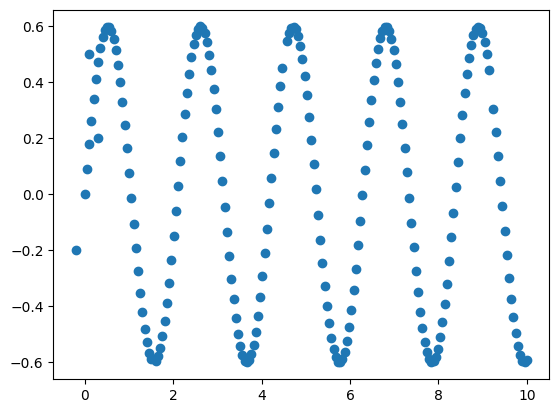

In [ ]:
# data loading
# Implement your appraoch by completing A
A = np.load("./Data/2_3/A.npy")

def recover_full(A) -> np.ndarray:
    # TODO
    # Step 1: Compute distance matrix
    D = -np.log(A + 1e-8)  # Violet log(0)
    #D = -np.log(A)

    # Step 2: Double centering to get Gram matrix
    n = D.shape[0]
    H = np.eye(n) - np.ones((n, n)) / n
    G = -0.5 * H @ D @ H  # Gram matrix

    # Step 3: Eigendecomposition
    eigvals, eigvecs = np.linalg.eigh(G)  # use eigh because G is symmetric

    # Step 4: Take top 2 eigenvalues and vectors
    idx = np.argsort(eigvals)[::-1]
    eigvals = eigvals[idx]
    eigvecs = eigvecs[:, idx]

    # Select top 2
    L = np.diag(np.sqrt(np.maximum(eigvals[:2], 0)))  # sqrt of eigenvalues
    V = eigvecs[:, :2]
    X_recovered = V @ L  # X such that G ≈ X @ X.T

    # Step 5: Affine alignment to match known x1,x2,x3
    # Known coordinates
    x1 = np.array([0.1, 0.5])
    x2 = np.array([-0.2, -0.2])
    x3 = np.array([0.3, 0.2])

    # Corresponding recovered coordinates (from MDS result)
    x1_hat = X_recovered[0]
    x2_hat = X_recovered[1]
    x3_hat = X_recovered[2]

    # Compute affine transformation: X_aligned = X_recovered @ A.T + b
    Y = np.stack([x1, x2, x3])      # target
    Y_hat = np.stack([x1_hat, x2_hat, x3_hat])  # source

    # Solve for A, b using least squares: Y = Y_hat @ A.T + b
    A_matrix, residuals, _, _ = np.linalg.lstsq(
        np.hstack([Y_hat, np.ones((3, 1))]), Y, rcond=None
    )
    A = A_matrix[:2, :].T  # 2x2
    b = A_matrix[2, :]     # 1x2

    # Apply transform to all points
    X_aligned = X_recovered @ A.T + b

    return X_aligned


    # Make sure your output is 200*2
    #return np.zeros((200,2))
X =  recover_full(A)
plt.scatter(X[:,0], X[:,1])


#Test
#A_hat = np.exp(-np.square(np.linalg.norm(X[:, None, :] - X[None, :, :], axis=-1)))
#relative_error = np.linalg.norm(A - A_hat) / np.linalg.norm(A)
#print(relative_error)

print("Diff x1:", np.linalg.norm(X[0] - np.array([0.1, 0.5])))
print("Diff x2:", np.linalg.norm(X[1] - np.array([-0.2, -0.2])))
print("Diff x3:", np.linalg.norm(X[2] - np.array([0.3, 0.2])))

### Task 2: Incomplete affinity matrix - Gradient calculation (0.5 points)
Similar to task 1, you are given an $200 \times 200$ affinity matrix $B$. However, most of the entries in `B` are missing and the missing entries are replaced by value `-1` (around 15000 entries in `B` are missing). Again, your task is to infer the coordinates of the data points which generate the affinity matrix `B`. Here we adopt an optimisation-based approach. Denoting the data points as $\{x_1, \ldots, x_n \}$, we will try to minimise:
$$ \min_{x_1, \ldots, x_n} L(x_1,\ldots, x_n) = \sum_{(i,j)\in \mathcal{O}} \left(\exp\left(-\Vert x_i - x_j \Vert_2^2\right) - B_{i,j}\right)^2, $$
where $\mathcal{O}$ is the set of indices for which the entries can be observed. It is the least square loss of the given affinity matrix and the (observed parts of) affinity matrix generated by the recovered coordinates. The optimal solution could be solved by iterated algorithms such as gradient descent. To start with, we first compute the gradient $\nabla_X L$ where $X$ is the data matrix where the $i$-th row represents the $x_i$. The gradient should also be a $n\times 2$ matrix with the $i$-th row to be the gradient $\nabla_{x_i} L$. First, calculate the closed-form of $\nabla_{x_i} L$.

TODO:

Given the loss function:
$
L(X) = \sum_{(i,j)\in \mathcal{O}} \left( \exp\left(-\Vert \mathbf{x}_i - \mathbf{x}_j \Vert_2^2 \right) - B_{i,j} \right)^2
$

<span><strong>Step 1: Single Term Gradient</span></strong>

For one observed pair $(i,j) \in \mathcal{O}$:
$
\ell_{ij} = \left( f_{ij} - B_{ij} \right)^2, where \quad f_{ij} = \exp\left(-\Vert \mathbf{x}_i - \mathbf{x}_j \Vert^2 \right)$


The gradient with respect to $\mathbf{x}_i$ is:
$
\nabla_{\mathbf{x}_i} \ell_{ij} = 2(f_{ij} - B_{ij}) \cdot \nabla_{\mathbf{x}_i} f_{ij}
$

<br>

<span><strong>Step 2: Gradient of $f_{ij}$</span></strong>
Compute $\nabla_{\mathbf{x}_i} f_{ij}$:
$
\nabla_{\mathbf{x}_i} f_{ij} = f_{ij} \cdot \nabla_{\mathbf{x}_i} \left( -\Vert \mathbf{x}_i - \mathbf{x}_j \Vert^2 \right) = -2f_{ij}(\mathbf{x}_i - \mathbf{x}_j)
$

Thus:
$
\nabla_{\mathbf{x}_i} \ell_{ij} = -4f_{ij}(f_{ij} - B_{ij})(\mathbf{x}_i - \mathbf{x}_j)$

<br>

<span><strong>Step 3: Complete Gradient</span></strong>

Considering all observations involving $\mathbf{x}_i$:
$
\nabla_{\mathbf{x}_i} L =
-4 \sum\limits_{j \in \mathcal{N}(i)} f_{ij}(f_{ij} - B_{ij})(\mathbf{x}_i - \mathbf{x}_j) $.





where $\mathcal{N}(i) = \{ j \mid (i,j) \in \mathcal{O} \}$.




### Task 3: Incomplete affinity matrix - Implementation (1.5 points)
In this task, we will implement the above optimisation procedure for the data recovery problem. You will be given an initial guess `X0` of the data points. You may use `X0` as the initialiser of your optimisation solver. Your tasks:
- Complete the function `loss_partial`, which outputs the value of loss function $L^m$.
- Complete the function `gradient_partial`, which outputs $\nabla_{X} L^m$
- Complete the function `recover_partial`, which outputs the inferred coordinates of the data points. You may use [scipy.optimize.minimize](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html) for the optimisation solver.

Hints:
- The data points could jointly form a closed shape. You may use this to check the correctness of your answer or design regularisers of the above problem.
- The coordinates of $x_1$ and $x_2$ are used to fix all the data points to a particular location and orientation. You may set the first two rows of the gradients as $0$ and set the initial point accordingly. Or, you can recalculate the affine transformation after the data points have been inferred.
- `scipy.optimize.minimize` only accepts $n\times 1$ vectors (it does not accept a matrix to be the variable). You may need to flatten the gradient we calculated above into a vector.

Note: We do not expect you to reconstruct the exact solution based on this method. Marks will be given solely based on the correctness of your implementation.

3560


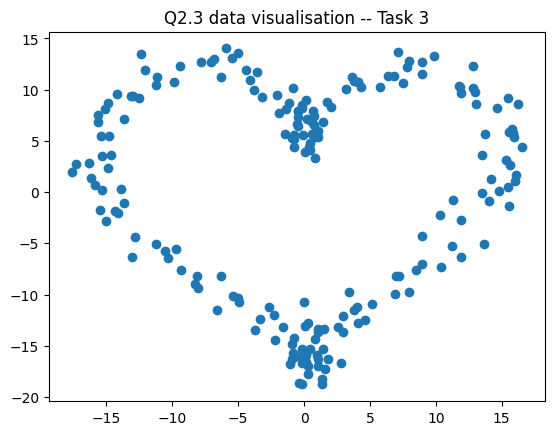

In [ ]:
B = np.load("./Data/2_3/B.npy")
X0 = np.load("./Data/2_3/X0.npy")
mask = B > 0
print(mask.sum())

from scipy.optimize import minimize

def loss_partial(X, B, mask) -> float:
    #Placeholder for the answer
    L = 0
    #TODO
    X = X.reshape((200, 2))
    for i in range(200):
        for j in range(200):
            if mask[i, j]:
                diff = X[i] - X[j]
                dist_sq = np.dot(diff, diff)
                sim = np.exp(-dist_sq)
                L += (sim - B[i, j]) ** 2

    return L

def gradient_partial(X, B, mask) -> np.ndarray:
    # Placeholder for the answer
    grad = np.zeros(np.shape(X))
    #TODO
    X = X.reshape((200, 2))
    grad = np.zeros(np.shape(X))
    #grad = np.zeros((200, 2))
    for i in range(200):
        for j in range(200):
            if mask[i, j]:
                diff = X[i] - X[j]
                dist_sq = np.dot(diff, diff)
                sim = np.exp(-dist_sq)
                grad_term = 4 * (sim - B[i, j]) * sim * diff
                grad[i] += grad_term
                grad[j] -= grad_term
    return grad.reshape(-1)

    #return grad


def recover_partial(B) -> np.ndarray:
    # Placeholder for the answer
    #X = np.zeros((200,2))
    mask = B > 0
    x0 = X0.reshape(-1)


    res = minimize(
        fun=loss_partial,
        x0=x0,
        args=(B, mask),
        method='L-BFGS-B',
        jac=gradient_partial,
        options={'maxiter': 300, 'disp': True}
    )

    return res.x.reshape((200, 2))


    #The output X should be in the shape (n,2) to make sure the plotting rountine works.
    #return X


plt.title("Q2.3 data visualisation -- Task 3")
X = recover_partial(B)
plt.scatter(X[:,0], X[:,1])
plt.show()